In [7]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [8]:
# reading the data and it's structure
loan_dataset = pd.read_csv("loan.csv")

In [9]:
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
loan_dataset.shape

(39717, 111)

In [11]:
loan_dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Dealing with null values (removing null values)

In [12]:
loan_dataset.dropna(axis = 1, how = 'all', inplace = True)
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Removing single valued columns
- They cannot contribute to our analysis in any way. So removing them.

In [13]:
loan_dataset.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Now we have 48 columns left with following characteristics 
- We are analyzing the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns / variables corresponding to that scenario.
- Also there are following columns - "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc", "out_prncp_inv" , "total_pymnt_inv ", "funded_amnt" that do not contribute to our analysis. While they can be useful for other purposes, we do not need them for our analysis for loan defaulting and hence can be dropped.

### Columns that do not pertain to our analysis (post approval of loan)
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record


In [14]:
loan_dataset.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [15]:
loan_dataset.shape

(39717, 21)

In [16]:
loan_dataset.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

### We are analyzing the data to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
- We cannot make anything up for the current loans and hence we can remove the data referring to 'Loan Status'

In [17]:
loan_dataset = loan_dataset[loan_dataset.loan_status != "Current"]
loan_dataset.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for missing values

In [18]:
(loan_dataset.isna().sum()/len(loan_dataset.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

## Handling Missing values
 - columns with missing values are "emp_length", "revol_util". 
 - So before going forward, lets see what kind of data each column has. 

In [19]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [20]:
print("Mode : " + loan_dataset.emp_length.mode()[0])
loan_dataset.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

### The above value counts shows that the mode value has far higher frequency than that of the next most frequent value. 
- This means that we can safely assign the value of mode to the null values in the column.
- Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [21]:
loan_dataset.emp_length.fillna(loan_dataset.emp_length.mode()[0], inplace = True)
loan_dataset.emp_length.isna().sum()

0

In [22]:
loan_dataset.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_dataset.revol_util.isna().sum()

0

## Standardization of the data 


In [24]:
loan_dataset.revol_util = pd.to_numeric(loan_dataset.revol_util.apply(lambda x : x.split('%')[0]))

In [25]:
loan_dataset.int_rate = pd.to_numeric(loan_dataset.int_rate.apply(lambda x : x.split('%')[0]))

In [26]:
loan_dataset.emp_length = pd.to_numeric(loan_dataset.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [27]:
loan_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


## Dealing with the Outlier

<Axes: >

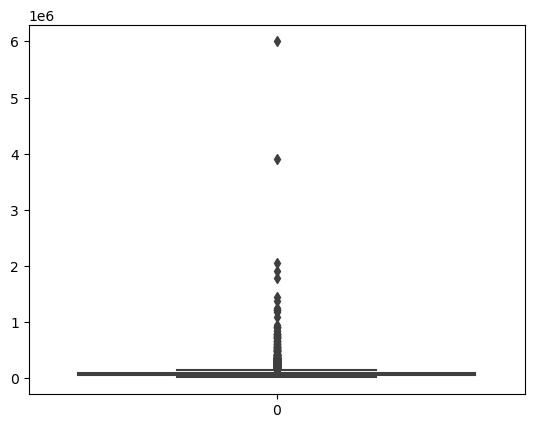

In [28]:
sns.boxplot(loan_dataset['annual_inc'])

- There are outliers in the data hence, we need to remove them
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution.
- Hence, considering threshold for removing outliers as 0.95

In [29]:
quantile_info = loan_dataset.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [30]:
per_95_annual_inc = loan_dataset['annual_inc'].quantile(0.95)
loan_dataset = loan_dataset[loan_dataset.annual_inc <= per_95_annual_inc]

<Axes: >

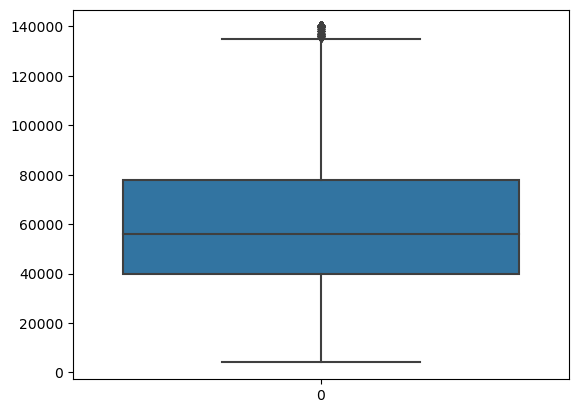

In [31]:
sns.boxplot(loan_dataset.annual_inc)

- Let's analyze other numerical variables such as dti, loan_amnt and funded_amnt_inv which could possibly have outliers.

<Axes: >

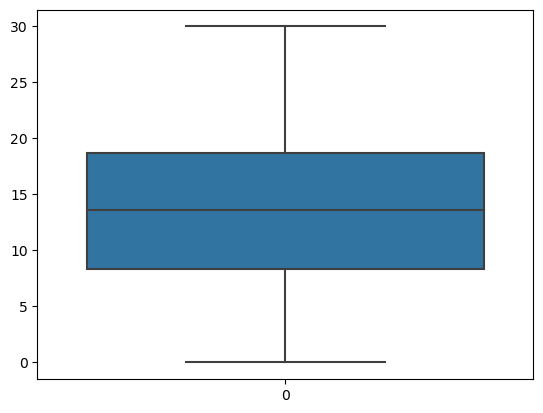

In [33]:
sns.boxplot(loan_dataset.dti)

<Axes: >

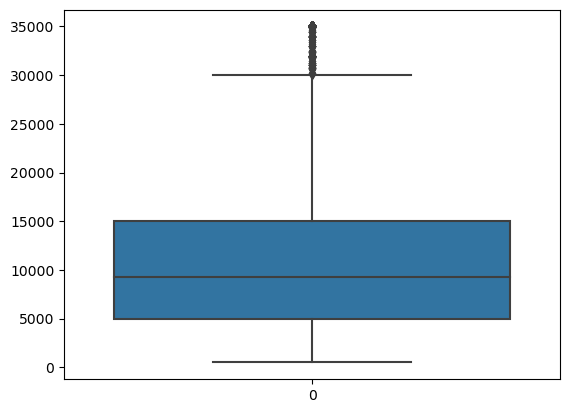

In [34]:
sns.boxplot(loan_dataset.loan_amnt)

In [35]:
loan_dataset.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

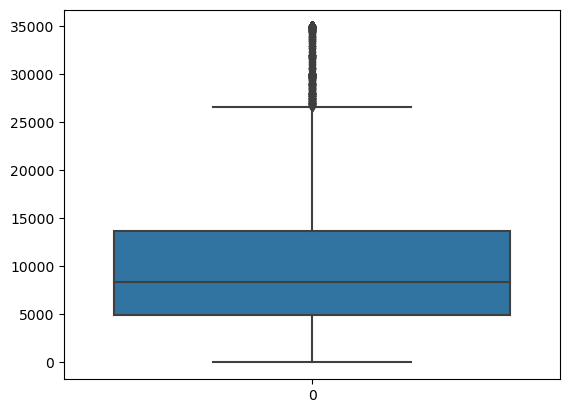

In [36]:
sns.boxplot(loan_dataset.funded_amnt_inv)

In [37]:
loan_dataset.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8396.342174
0.750    13649.999283
0.900    19750.000000
0.950    23949.287805
0.970    24975.000000
0.975    25350.000000
0.980    27953.287538
0.985    29925.000000
0.990    31966.803281
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

- Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

## Creating vizualization for Categorical Data
- We are only analyzing and visualizing the defaulter data. 

<Axes: xlabel='loan_status', ylabel='count'>

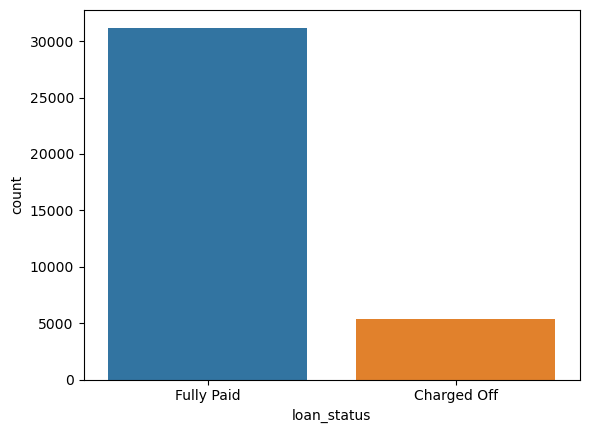

In [38]:
sns.countplot(x = 'loan_status', data = loan_dataset)

In [39]:
loan_dataset.sub_grade = pd.to_numeric(loan_dataset.sub_grade.apply(lambda x : x[-1]))
loan_dataset.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

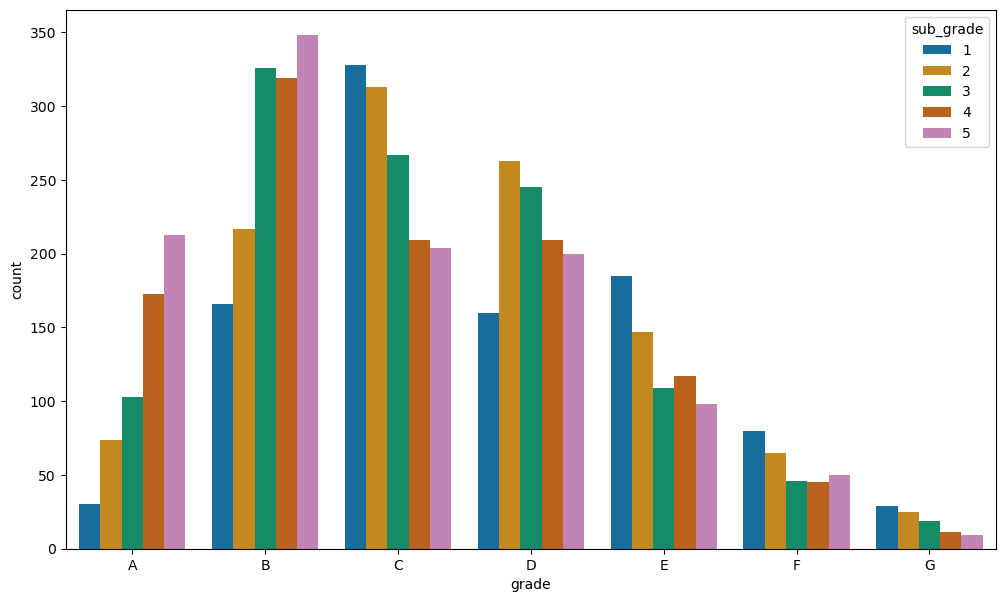

In [40]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_dataset[loan_dataset.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

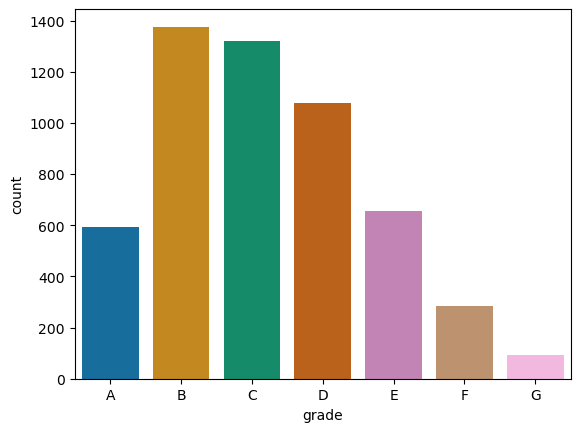

In [41]:
sns.countplot(x = 'grade', data = loan_dataset[loan_dataset.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

####  Analyzing home_ownership

In [42]:
#checking unique values for home_ownership
loan_dataset['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

#### Replacing 3 "OTHER" records with "NONE"

In [43]:
#replacing 'NONE' with 'OTHERS'
loan_dataset['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [44]:
#checking unique values for home_ownership again
loan_dataset['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

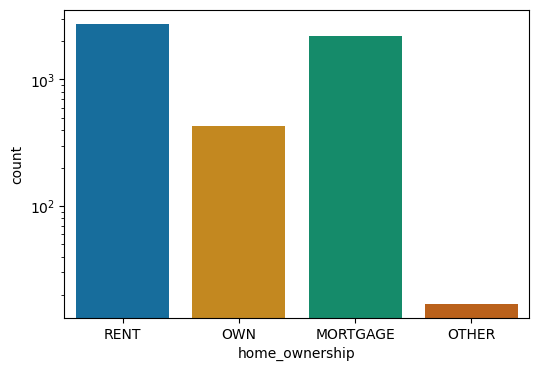

In [45]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

####  Analyzing purpose

<Axes: xlabel='count', ylabel='purpose'>

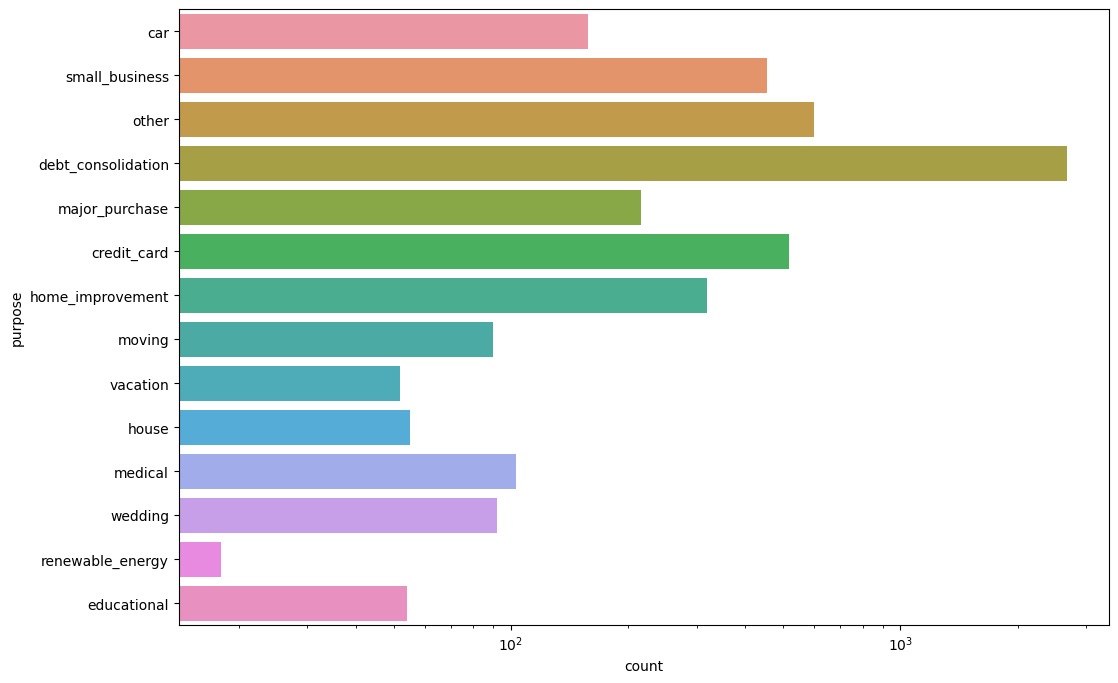

In [46]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])


#### Creating bins for some numerical variable to make them categorical

In [47]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_dataset['int_rate_groups'] = pd.cut(loan_dataset['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_dataset['open_acc_groups'] = pd.cut(loan_dataset['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_dataset['revol_util_groups'] = pd.cut(loan_dataset['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_dataset['total_acc_groups'] = pd.cut(loan_dataset['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_dataset['annual_inc_groups'] = pd.cut(loan_dataset['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [48]:
# Viewing new bins created
loan_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


#### Analyzing interest rate with respect to the interest rate bins created

<Axes: xlabel='emp_length', ylabel='count'>

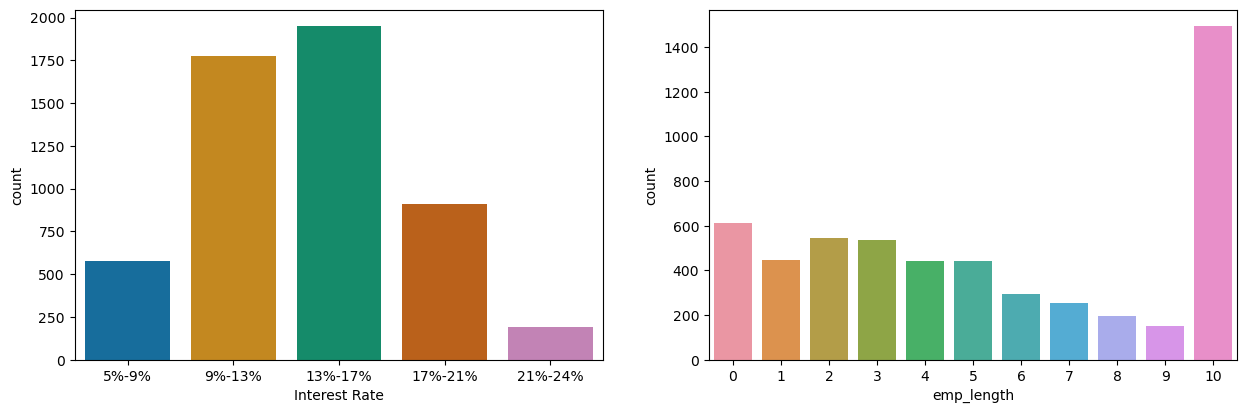

In [50]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])

####  Analyzing open_acc,revol_util,total_acc,annual_inc

<Axes: xlabel='open_acc_groups', ylabel='count'>

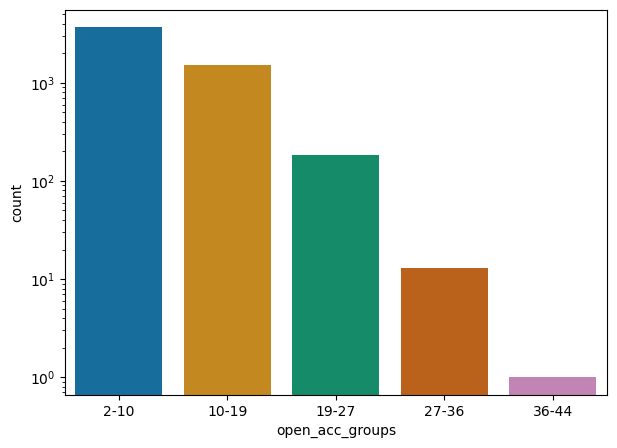

In [51]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

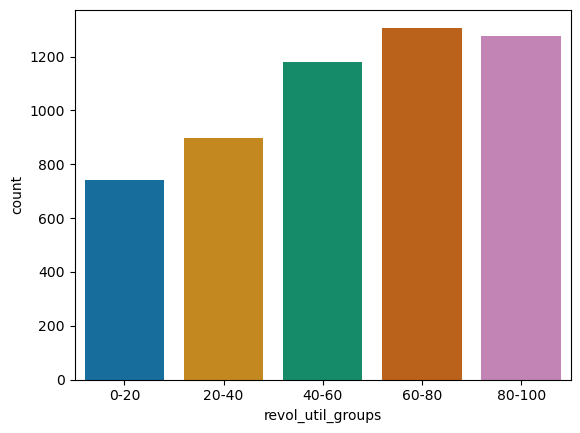

In [52]:
sns.countplot(x='revol_util_groups', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

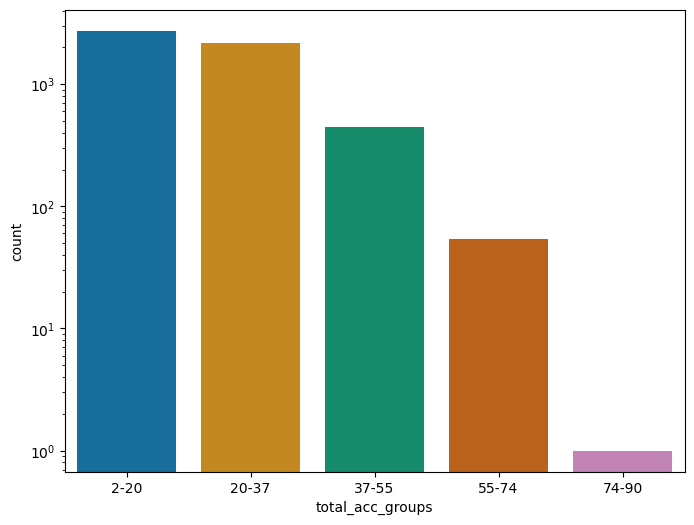

In [54]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

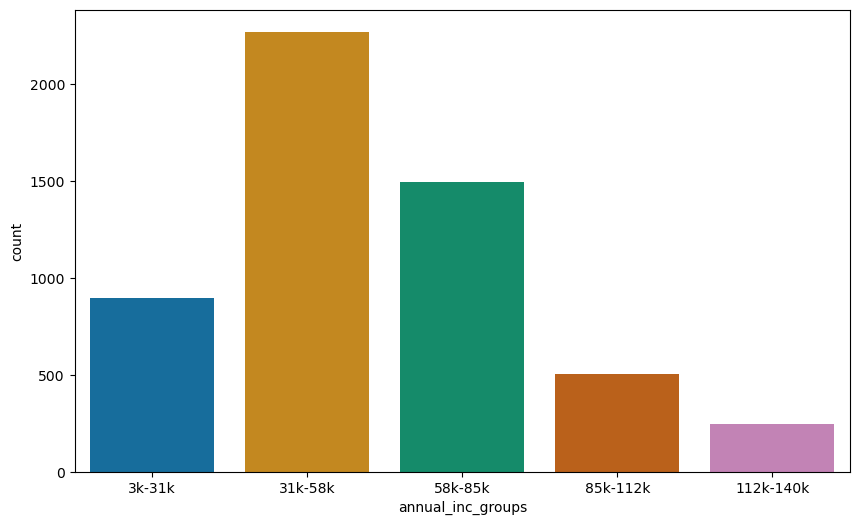

In [55]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

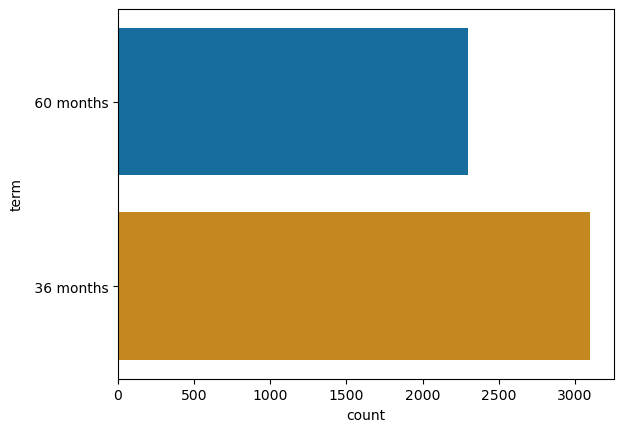

In [56]:
sns.countplot(y='term', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

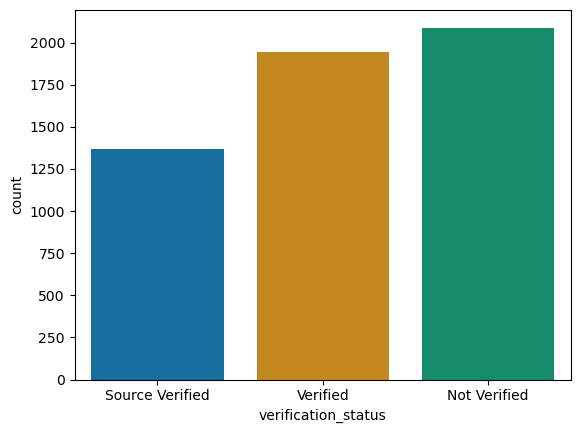

In [57]:
sns.countplot(x='verification_status', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

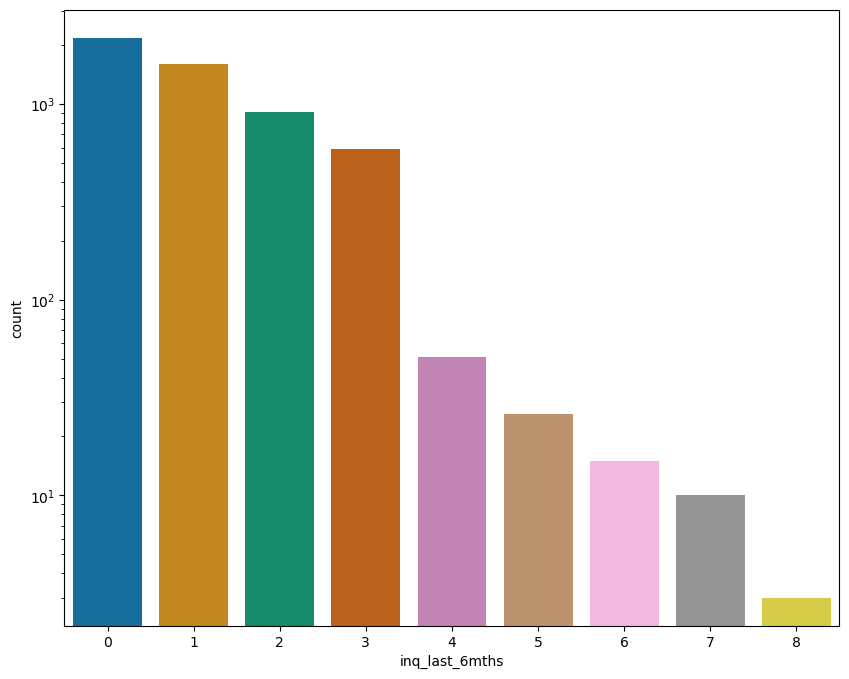

In [58]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

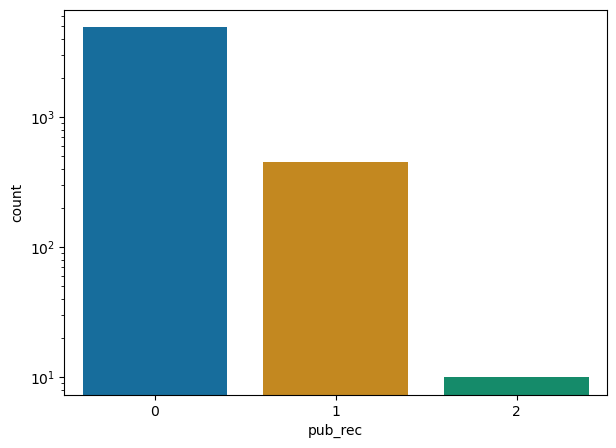

In [59]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

### Analyzing by issued month and year


In [60]:
## Extracting month and year
df_month_year = loan_dataset['issue_d'].str.partition("-", True)     
loan_dataset['issue_month']=df_month_year[0]                       
loan_dataset['issue_year']='20' + df_month_year[2]

In [61]:
loan_dataset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


<Axes: xlabel='issue_year', ylabel='count'>

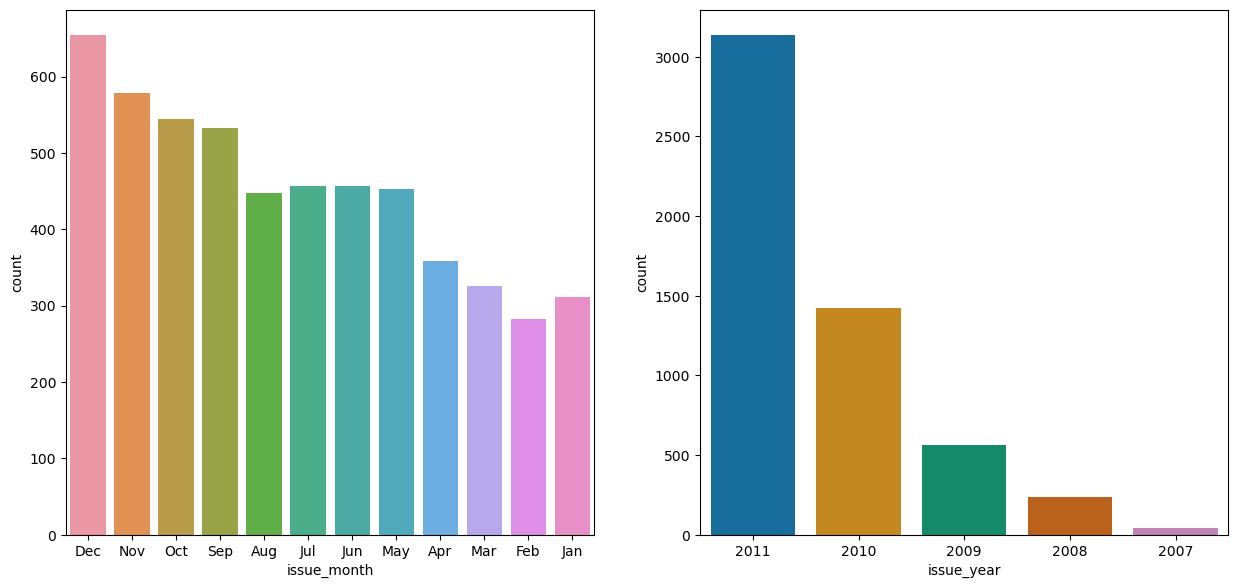

In [62]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

- Peculiar Insight - Number of defaults were the highest when the loan was sanctioned/issued in December.

### Analyzing installment,dti, loan_amnt 


In [63]:
loan_dataset['installment_groups'] = pd.cut(loan_dataset['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_dataset['funded_amnt_inv_group'] = pd.cut(loan_dataset['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_dataset['loan_amnt_groups'] = pd.cut(loan_dataset['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_dataset['dti_groups'] = pd.cut(loan_dataset['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

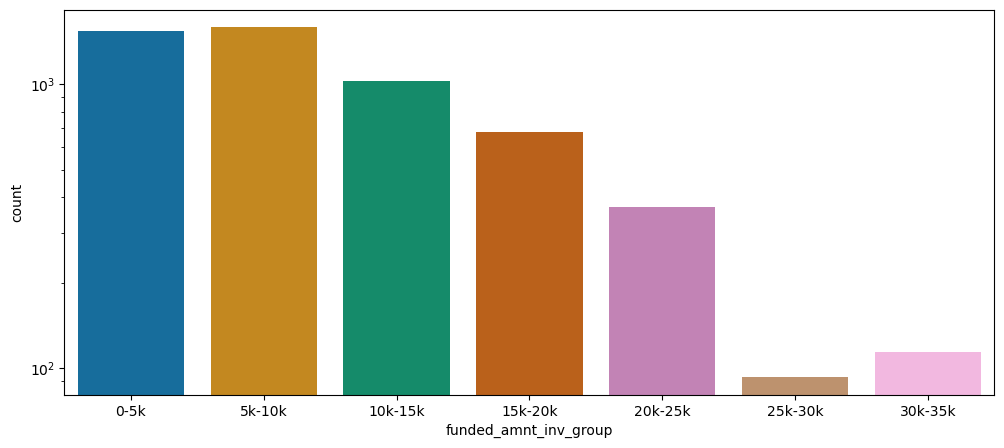

In [64]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

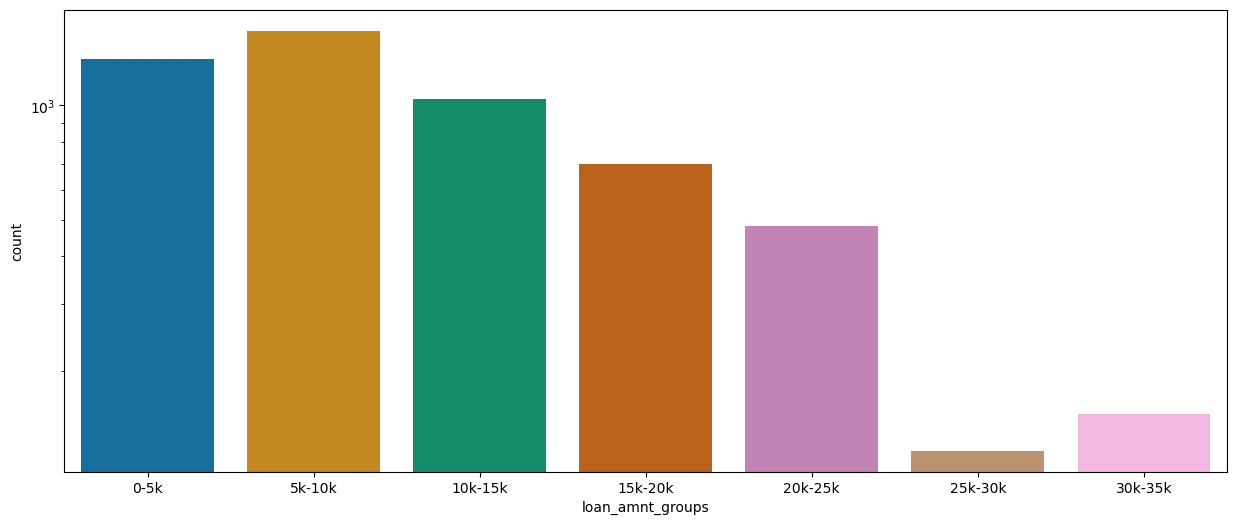

In [65]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

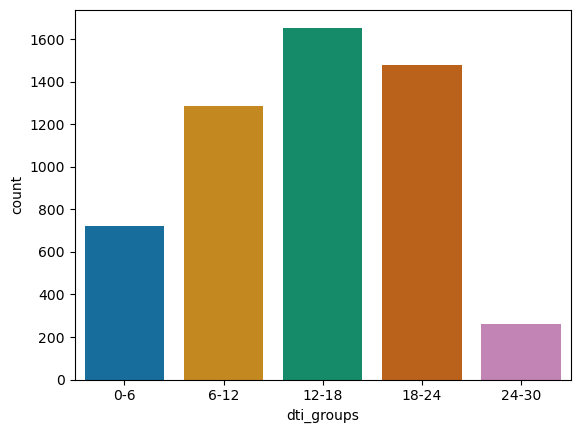

In [66]:
sns.countplot(x='dti_groups', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

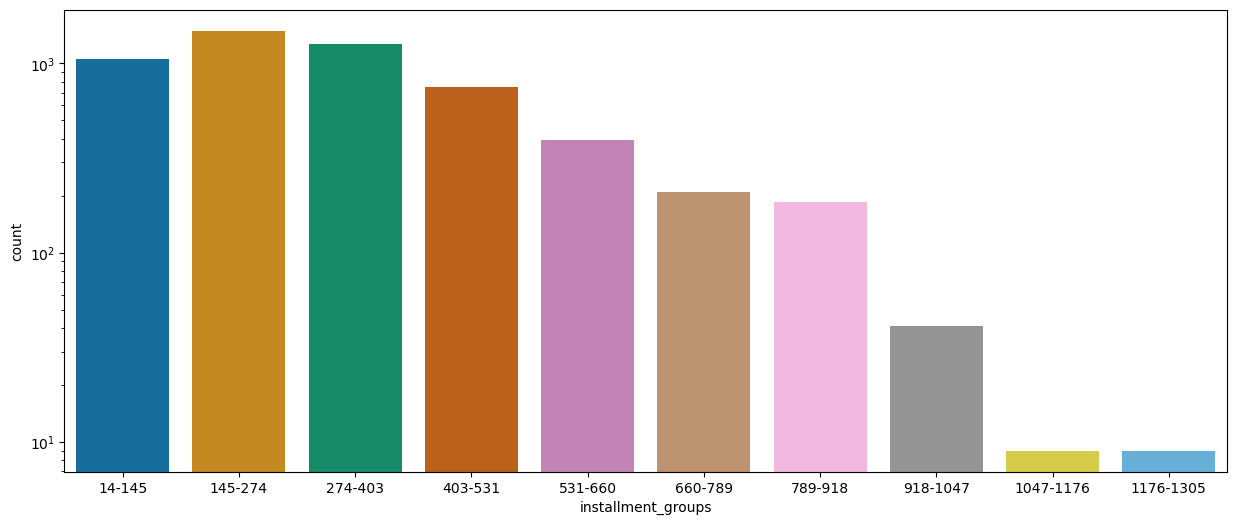

In [67]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

# Observations

### There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.


### Also there is a very interesting observation from the date issued. The late months of an year indicated the high possibility of defaulting. 
- The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)

## Analysing annual income with other columns for more insights 

#### 1.Annual income vs loan purpose

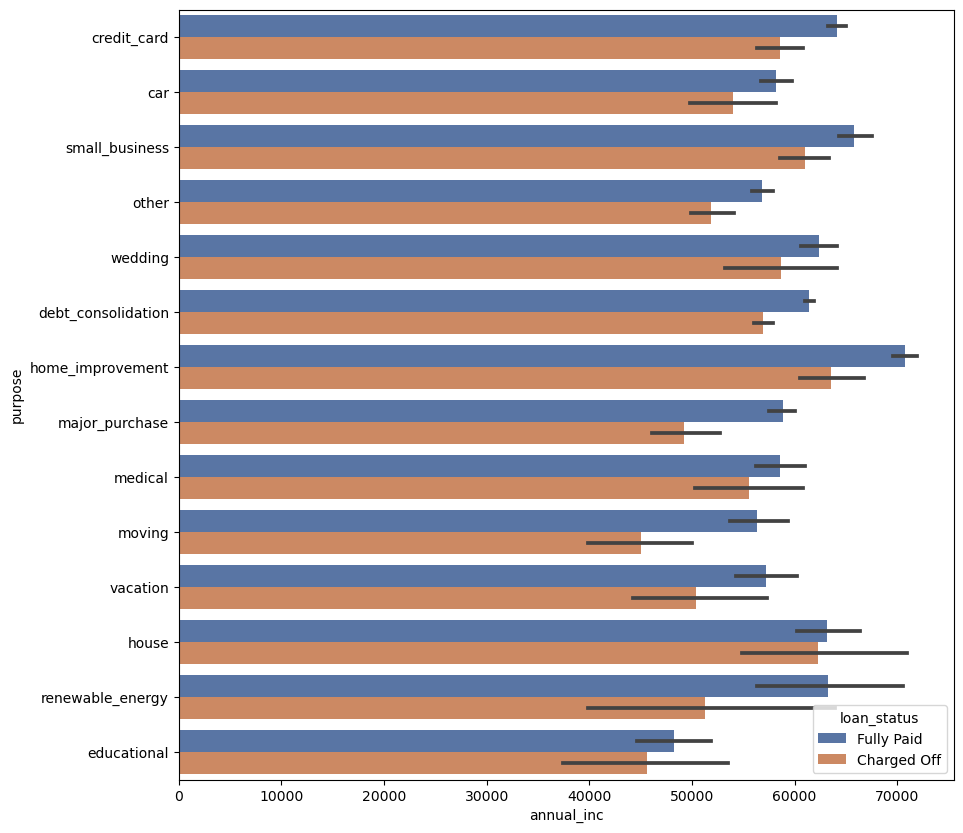

In [68]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_dataset,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### 2.Annual income vs home ownership

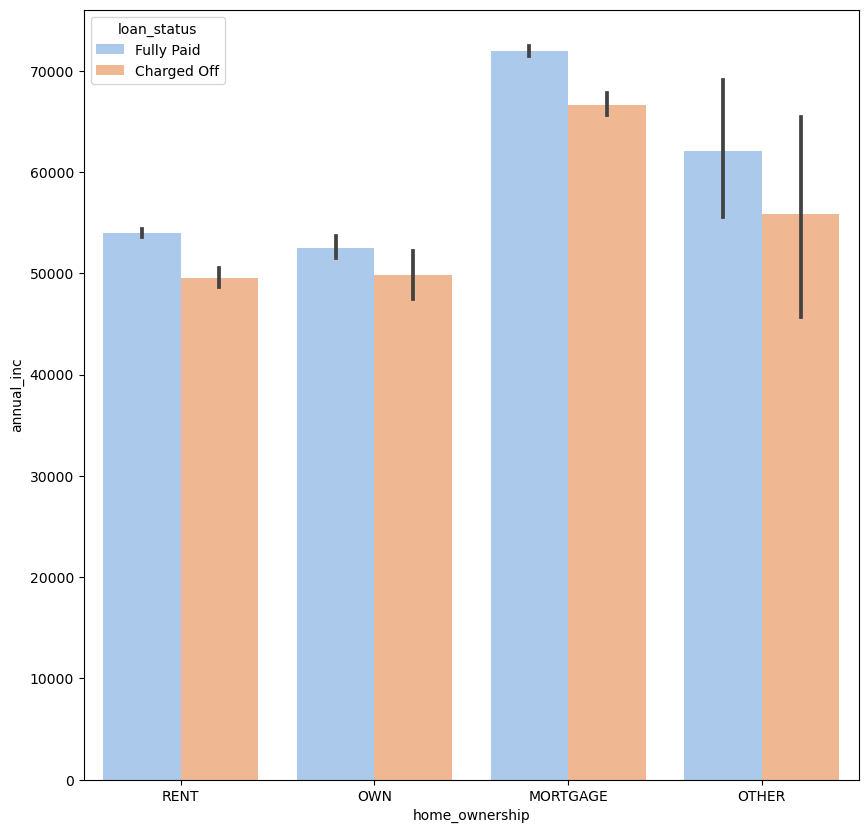

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_dataset,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### Annual Income vs Loan amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

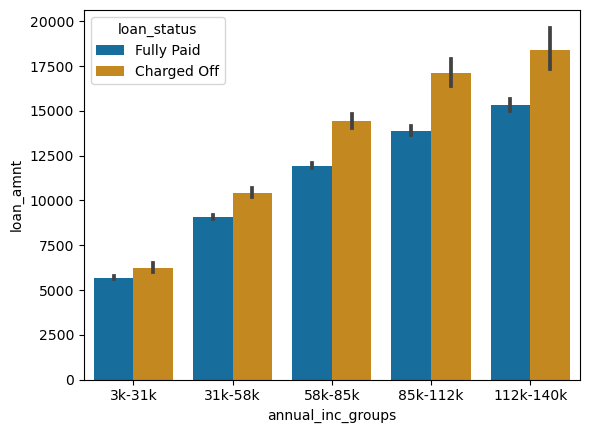

In [70]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_dataset)

- The  defaulted loan_amount has almost similar proportion for every income group.

#### 3. Annual income vs int_rate

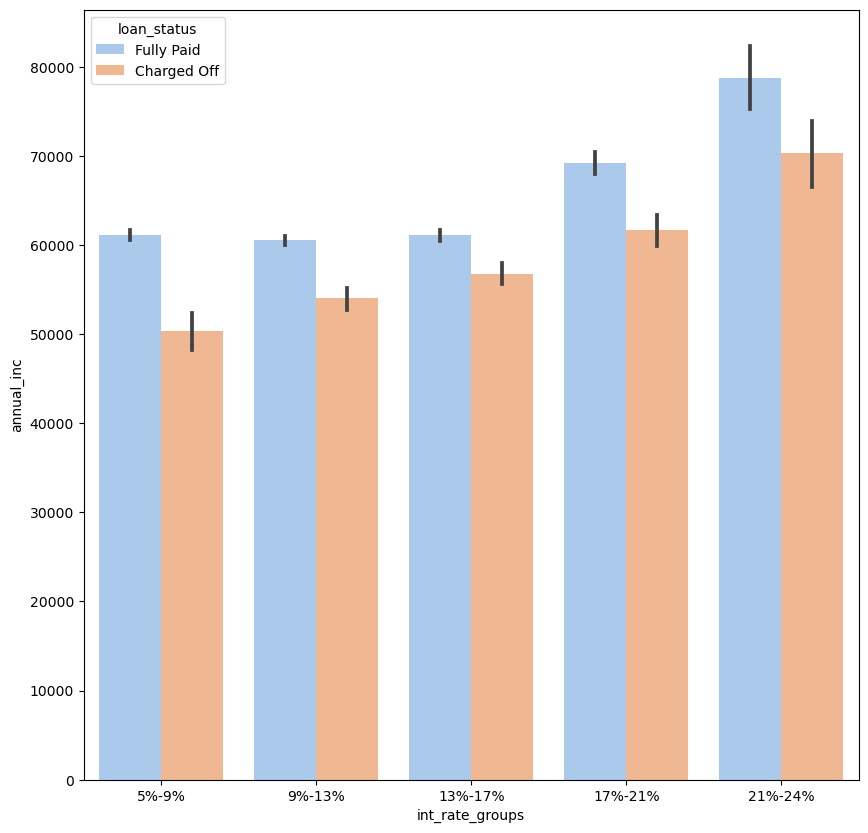

In [71]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_dataset,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## Analysing loan_amount with other columns for more insights 

#### 1.Loan Amount vs Interest Rate

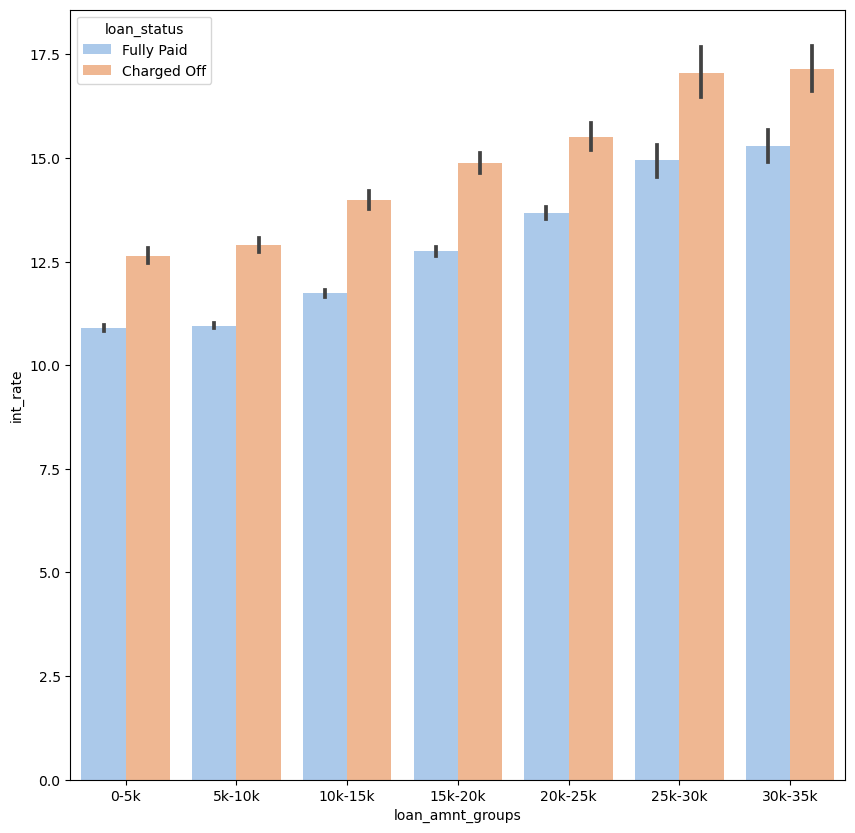

In [72]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_dataset,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### 2.Loan vs Loan purpose

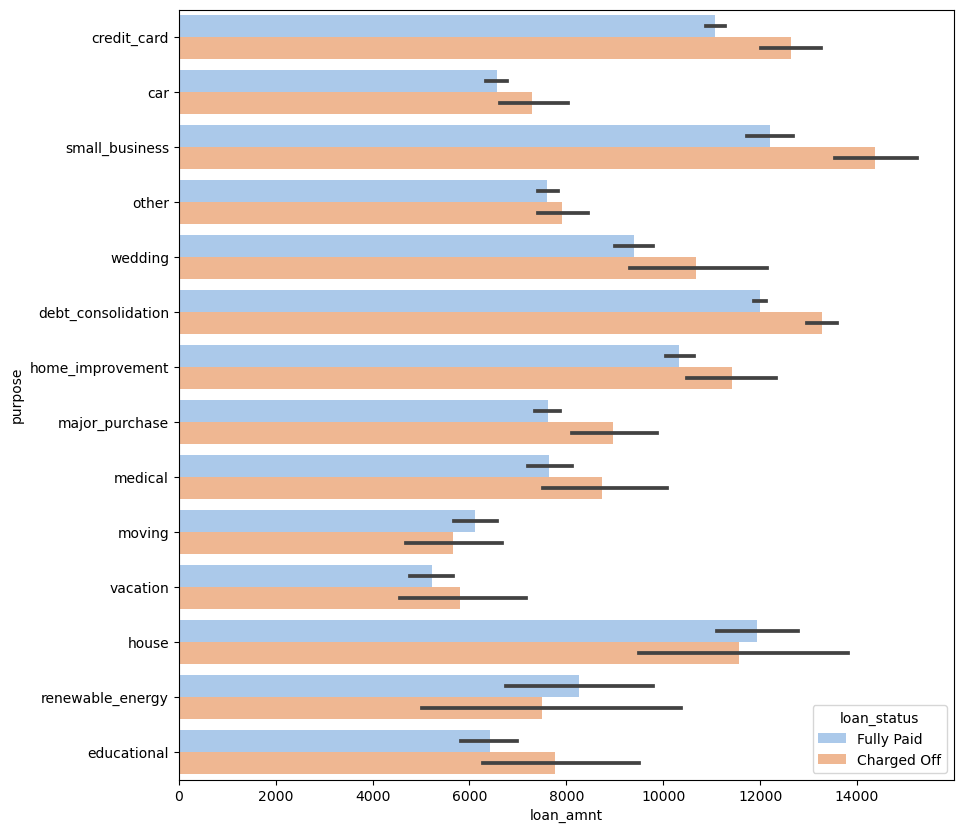

In [73]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_dataset,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### 3.Loan vs House Ownership

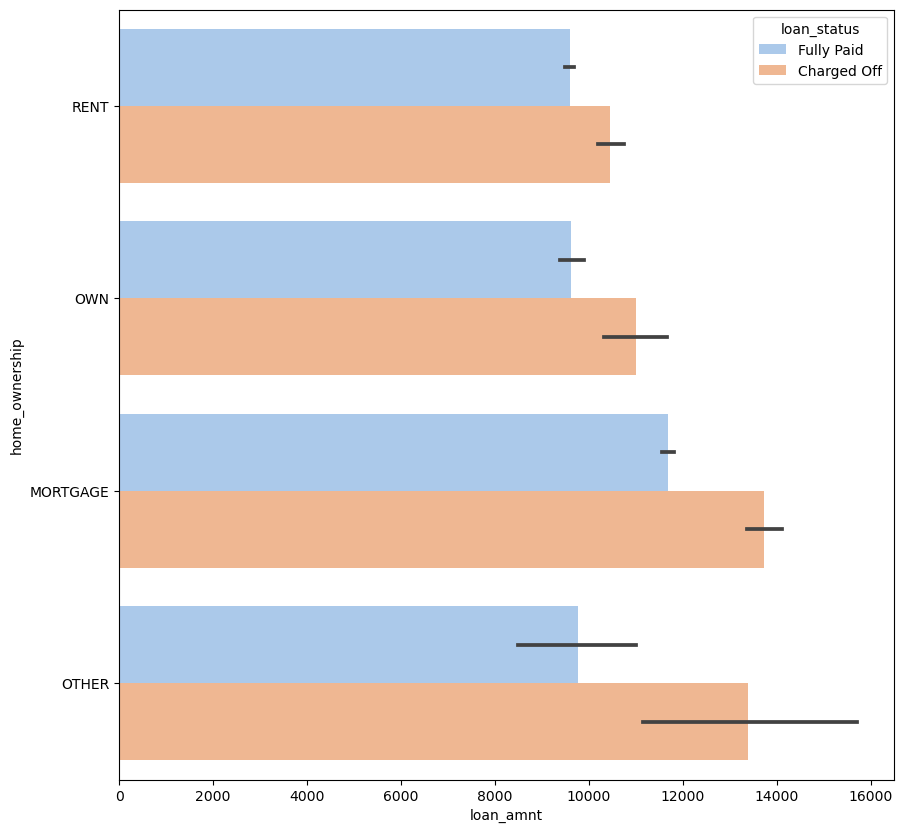

In [74]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_dataset,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### 4.Loan amount vs month issued and year issued

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

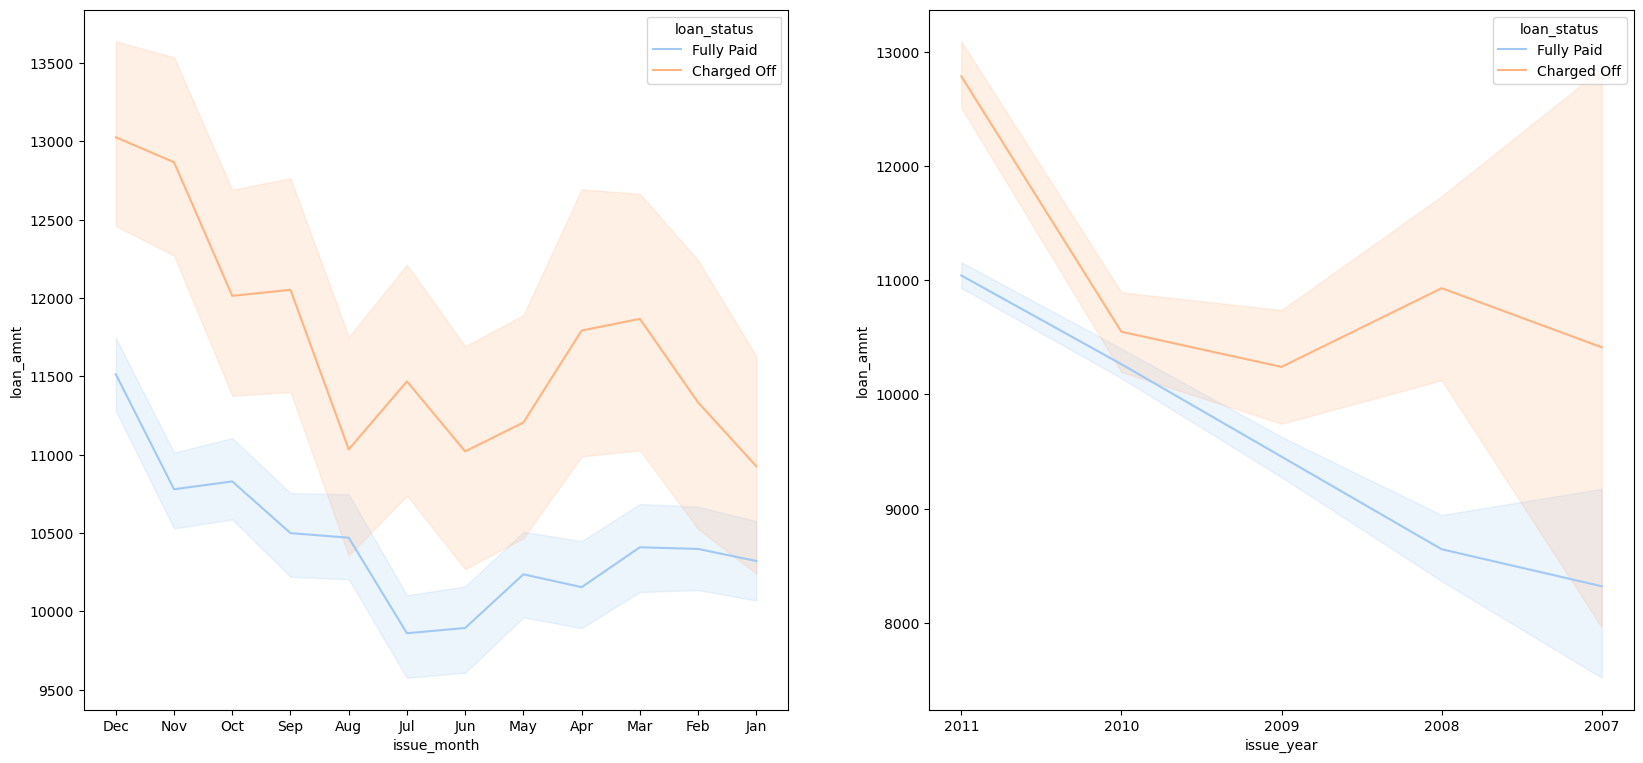

In [75]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_dataset,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_dataset,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")


#### 5.Loan amount vs Grade

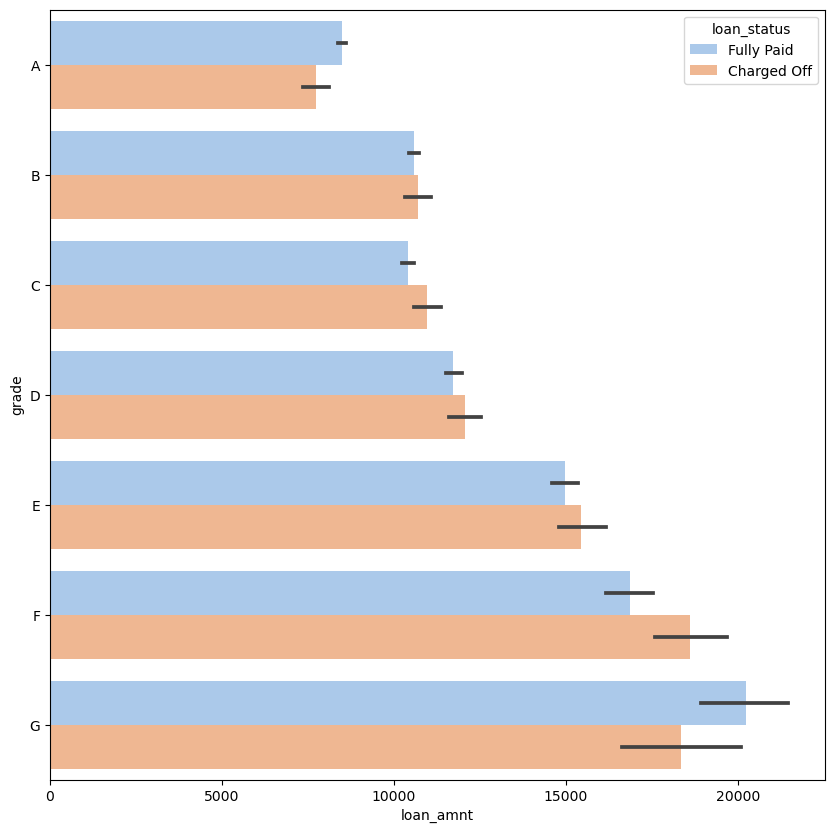

In [76]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_dataset,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

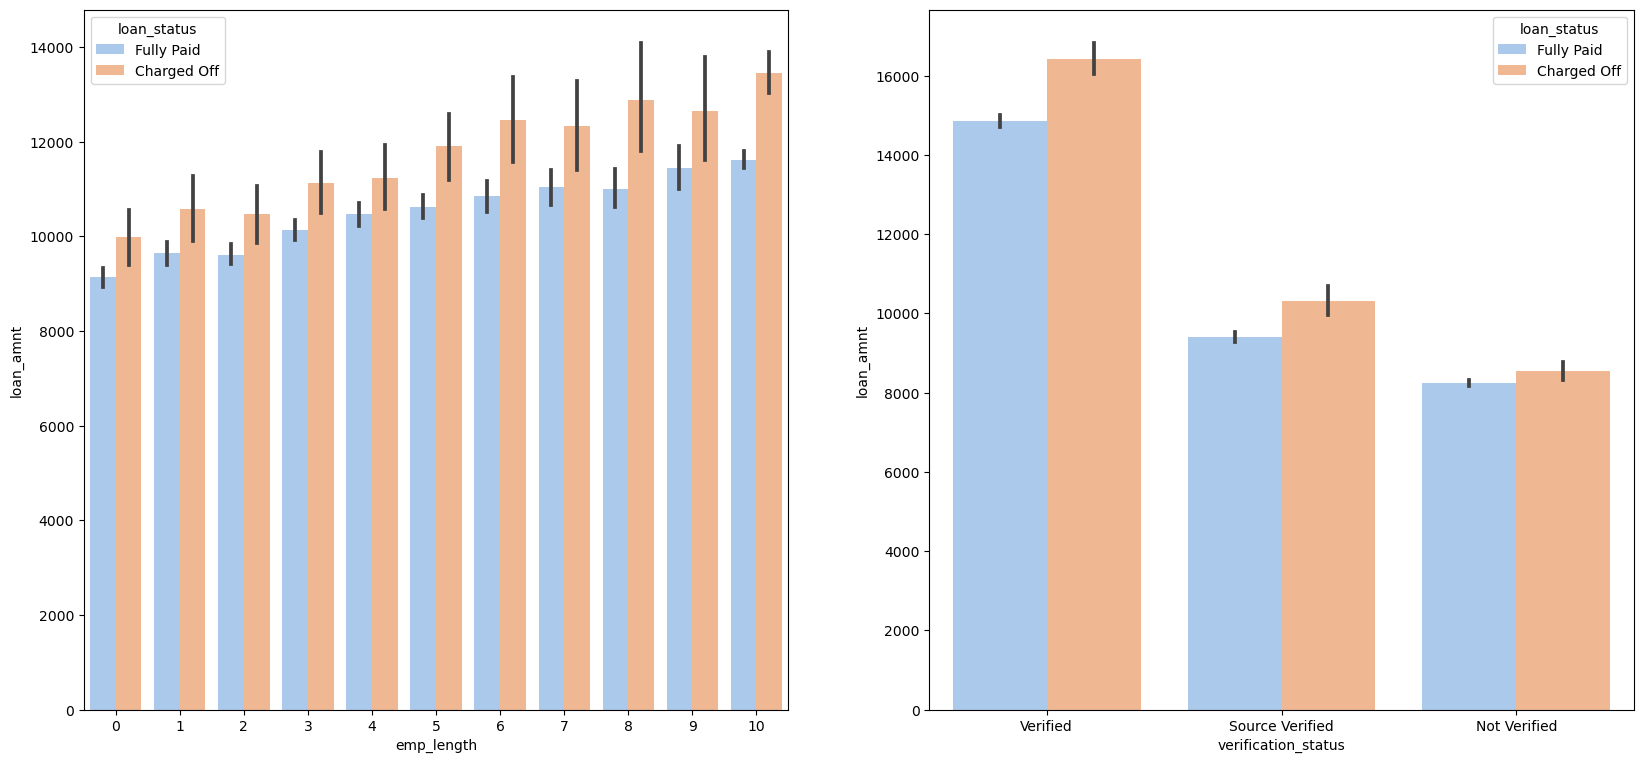

In [77]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_dataset,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_dataset,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


- Employees with longer employment length have loan approved for a higher amount. 

- Looking at the verification status data, verified loan applications tend to have higher loan amount.

#### grade vs interest rate

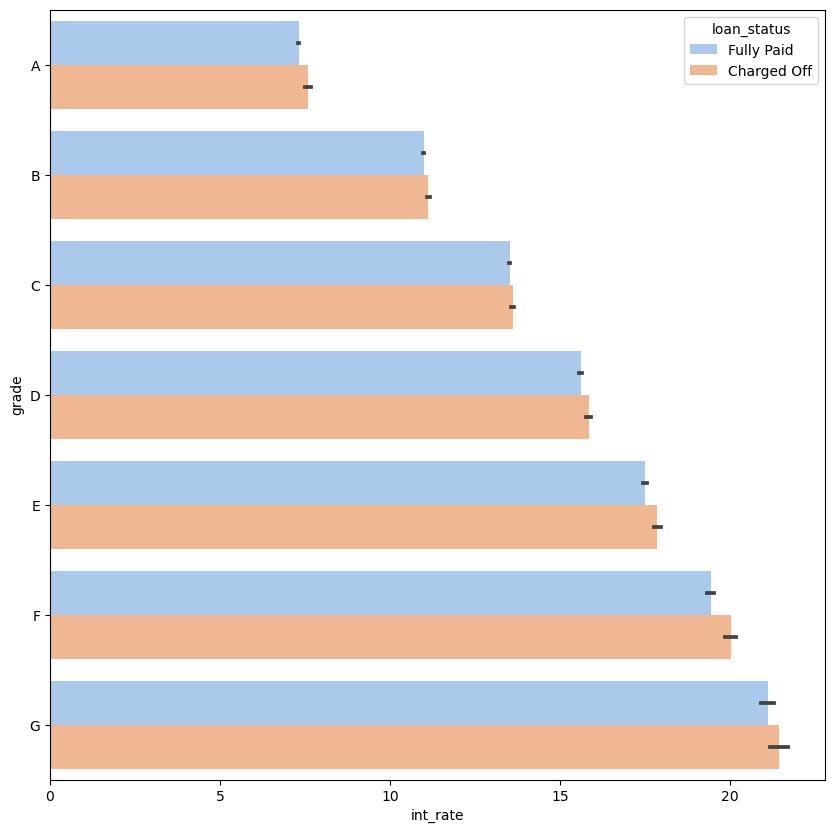

In [78]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_dataset,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

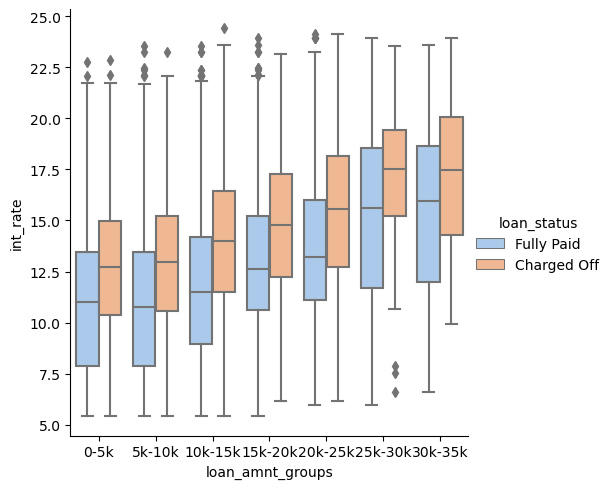

In [79]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =loan_dataset,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
- This can be a pretty strong driving factor for loan defaulting.

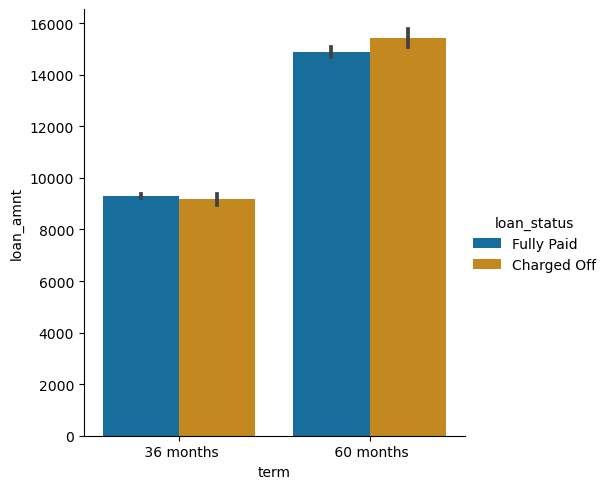

In [80]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_dataset,hue = 'loan_status', kind = 'bar')


- Which means that applicants applying for long term has applied for more loan. 

# Conclusion

### As per the above analysis there is more possibility of defaulting when : 

- Applicants with annual income group of 112k - 114k have higher probability of taking loans and defaulting as well.
- Applicants who have Mortgage are more likely to take loans. Their group has also high probability of loan defaulting. The loan ranges between 14k - 16k
- Applicants who have higher term i.e. 60 months have higher loan amounts and have higher Charged Off Count
- Applicants who have Status Unverified have lesser loans sanctioned to them.
- When the loan status is verified and loan amount is above 16k
- For applicants who have employment length of 10yrs, the loan amount is 12k-14k which is higher than any other employment   length.
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
